In [1]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os



In [2]:
from keras.preprocessing import image_dataset_from_directory

In [34]:
data_directory = 'data'
data = image_dataset_from_directory(data_directory, batch_size=4)

Found 23 files belonging to 2 classes.


In [35]:
data_iterator = data.as_numpy_iterator()

In [36]:
batch = data_iterator.next()

In [37]:
batch[1]

array([1, 1, 0, 0])

In [38]:
batch[0].shape

(4, 256, 256, 3)

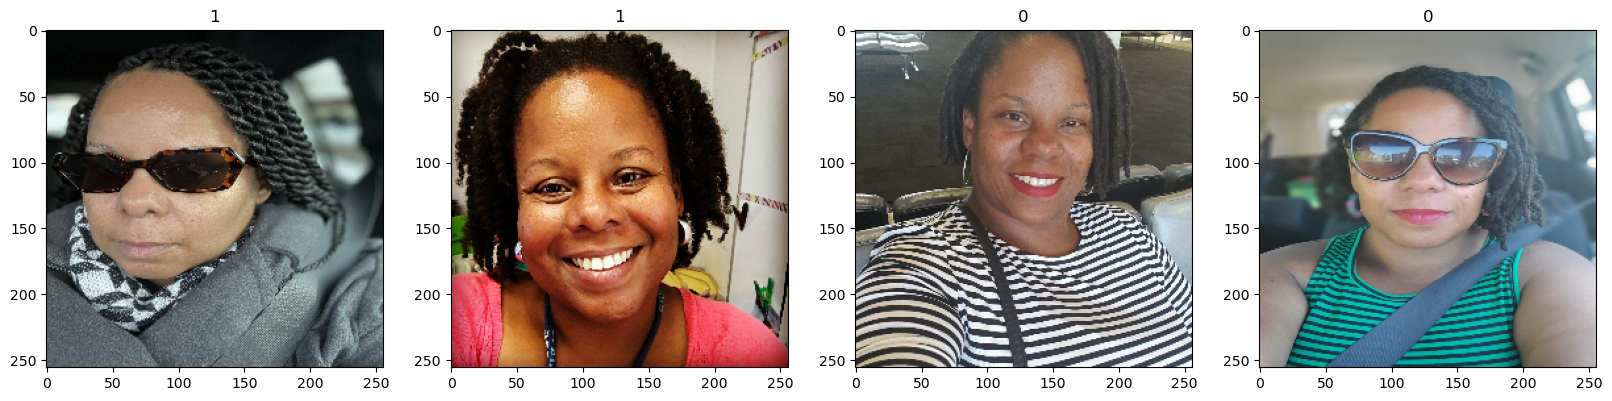

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [40]:
# Scale the data
data = data.map(lambda x,y: (x/255,y))

In [41]:
data.as_numpy_iterator().next()

(array([[[[0.3622549 , 0.34509805, 0.33186275],
          [0.3622549 , 0.34509805, 0.33186275],
          [0.3622549 , 0.34509805, 0.33186275],
          ...,
          [0.7138787 , 0.7058058 , 0.6107843 ],
          [0.757554  , 0.7315736 , 0.6591165 ],
          [0.71273744, 0.7049096 , 0.6372626 ]],
 
         [[0.46029413, 0.43970588, 0.42303923],
          [0.46029413, 0.43970588, 0.42303923],
          [0.46029413, 0.43970588, 0.42303923],
          ...,
          [0.89411765, 0.8930549 , 0.6886489 ],
          [0.90711164, 0.8919156 , 0.7051413 ],
          [0.904743  , 0.9044807 , 0.73970395]],
 
         [[0.45490196, 0.42745098, 0.40392157],
          [0.45490196, 0.42745098, 0.40392157],
          [0.45490196, 0.42745098, 0.40392157],
          ...,
          [0.8750057 , 0.86673754, 0.66652495],
          [0.87588847, 0.85235906, 0.65539217],
          [0.8456074 , 0.8366728 , 0.67711204]],
 
         ...,
 
         [[0.6125019 , 0.68594515, 0.7681813 ],
          [0.63724

In [42]:
len(data)

6

In [43]:
#5. Split Data
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.2)+1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [44]:
# 6. Build DL model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [45]:
model = Sequential()

In [46]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)            

In [50]:
# Train
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [51]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks =[tensorboard_callback])

Epoch 1/10


In [ ]:
# Save the model
from tf.keras.models import load_model
model.save(os.path.join('models', 'imageclassifier.h5'))

In [ ]:
img = cv2.imread('IMG_1973.jpg')
plt.imshow(img)
plt.show()

: 